In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


- https://zpl.fi/aligning-point-patterns-with-kabsch-umeyama-algorithm/
- https://pymolwiki.org/index.php/Kabsch#:~:text=The%20Kabsch%20algorithm%20uses%20linear,implementation%20of%20the%20Kabsch%20algorithm.
- https://stackoverflow.com/questions/60877274/optimal-rotation-in-3d-with-kabsch-algorithm
- https://towardsdatascience.com/the-definitive-procedure-for-aligning-two-sets-of-3d-points-with-the-kabsch-algorithm-a7ec2126c87e
- http://computerandchemistry.blogspot.com/2013/04/calculate-rmsd-from-two-xyz-files.html

- NOTE import own data? set import_matrices arg with default option if no data
- NOTE docstrings
- NOTE calculate RMSD? 
- NOTE generate visualisation of data? 

In [2]:
# 1 initialise the two matrices as np.arrays
def import_matrices():

    # create two random matrices
    A = np.random.random((3,10))
    B = np.random.random((3,10))
    
    return A, B

In [3]:
A, B = import_matrices()

# Visualise the xyz coordinates of A and B

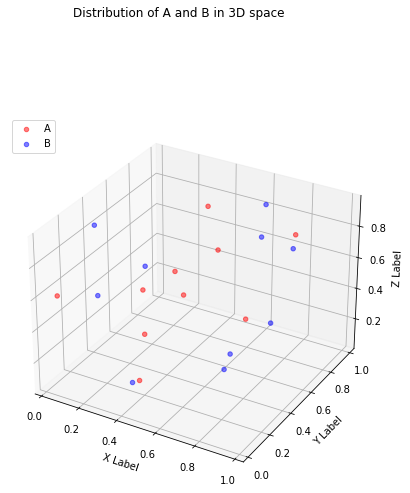

In [4]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')

Ax, Ay, Az = A
Bx, By, Bz = B

ax.scatter(Ax, Ay, Az, c='r', marker='o', label='A', alpha=0.5)
ax.scatter(Bx, By, Bz, c='b', marker='o', label='B', alpha=0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.legend(loc='upper left')
plt.suptitle('Distribution of A and B in 3D space')

plt.show()

In [6]:
# 2 translate A and B so their centroids are on the origin (0,0,0) - do this by subtracting from each element the average of the whole column
def translate_to_origin(A, B):

    # find and store mean value for each column (x, y, z)
    Ax_mean, Ay_mean, Az_mean = np.mean(A, axis=1)
    Bx_mean, By_mean, Bz_mean = np.mean(B, axis=1)

    # A and B can be split into 3 cols of x,y,z co-ords
    Ax, Ay, Az = A
    Bx, By, Bz = B
    
    # set up lists of cols and means to iterate through
    columns = [Ax, Ay, Az, Bx, By, Bz] 
    means = [Ax_mean, Ay_mean, Az_mean, Bx_mean, By_mean, Bz_mean]

    # set up empty matrices to hold updated values
    translated_matrices = np.empty(shape=(6,10))
    translated_column = np.empty(shape=(1,10))

    # iterate through column values and substract column mean for each col in each matrix
    for column, mean in zip(columns, means):
        for coord in column:
            translated_coord = (coord - mean)
            np.append(translated_column, translated_coord) # NOTE CHECK THIS IS IN RIGHT PLACE (BACK A TAB?)


    np.append(translated_matrices, translated_column)
    
    # separate results back into the two respective matrices A and B 
    A_translated = translated_matrices[0:3, 0:10]
    B_translated = translated_matrices[3:6, 0:10]


    return A_translated, B_translated, means

In [7]:
A_translated, B_translated, means = translate_to_origin(A, B)

# Visualise data translated to origin

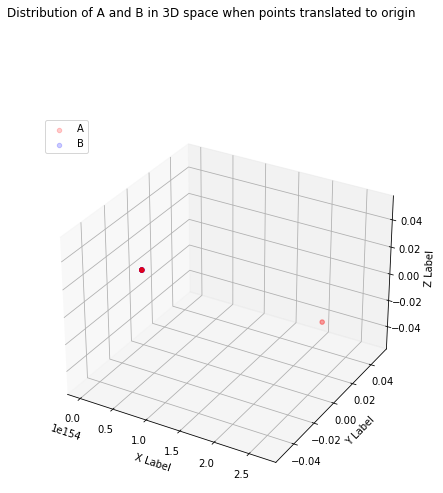

In [8]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')

Ax, Ay, Az = A_translated
Bx, By, Bz = B_translated

ax.scatter(Ax, Ay, Az, c='r', marker='o', label='A', alpha=0.2)
ax.scatter(Bx, By, Bz, c='b', marker='o', label='B', alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.legend(loc='upper left')
plt.suptitle('Distribution of A and B in 3D space when points translated to origin')

plt.show()

# Step 3 find optimal rotation matrix that turns A as close as possible to B (minimise RMSD) & apply that rotation to A

In [9]:

def compute_covariance_matrix(A_translated, B_translated):
    
    # multiply Bt (transposed) by A (gives H)
    H = np.matmul(B_translated.T, A_translated)

    return H 

In [10]:
H = compute_covariance_matrix(A_translated, B_translated)

In [11]:
def compute_optimal_rotation_matrix(H):
    
    # find SVD of H 
    U, S, V = np.linalg.svd(H) # np.linalg.svd returns transpose of V
    Vt = V
    # keep matrices 1 and 3 from the decomposition (U and V) - will be Vt if python svd gives transposed V
    # rotation matrix R is Vt x Ut (transposed U) (transpose V if not given as transposed)
    R = np.matmul(Vt, U.T)

    return R

In [12]:
R = compute_optimal_rotation_matrix(H)

In [13]:
def apply_rotation(A_translated, R):

    # to get rotated A, multiply A x R
    A_rotated = np.matmul(A_translated, R)

    return A_rotated

In [14]:
A_rotated = apply_rotation(A_translated, R)

In [15]:
# 4 translate A back to where B originally was centered (add back averages to matrix columns)
def revert_translation(means, B_translated, A_rotated):

    # A and B can be split into 3 cols of x,y,z co-ords
    Ax, Ay, Az = A_rotated
    Bx, By, Bz = B_translated

    columns = [Ax, Ay, Az, Bx, By, Bz]

    # set up empty matrices to hold updated values
    reverted_matrices = np.empty(shape=(6,10))
    reverted_column = np.empty(shape=(1,10))

    # iterate through column values and add column mean for each col in each matrix
    for column, mean in zip(columns, means):
        for coord in column:
            reverted_coord = (coord + mean)
            np.append(reverted_column, reverted_coord)
    np.append(reverted_matrices, reverted_column)
    
    # separate results back into the two respective matrices A and B 
    A_reverted = reverted_matrices[0:3, 0:10]
    B_reverted = reverted_matrices[3:6, 0:10]

    return A_reverted, B_reverted

In [16]:
A_reverted, B_reverted = revert_translation(means, B_translated, A_rotated)

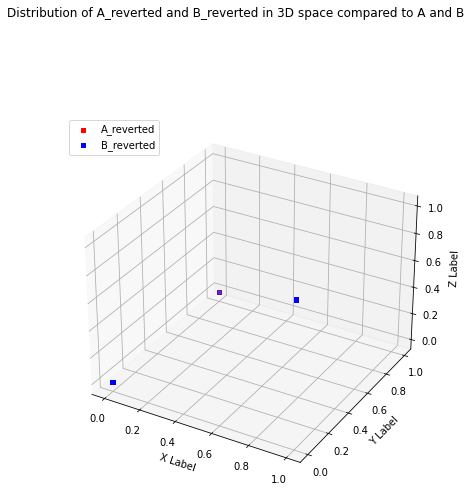

In [17]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(211, projection='3d')

Ax_rvt, Ay_rvt, Az_rvt = A_reverted
Bx_rvt, By_rvt, Bz_rvt = B_reverted

ax.scatter(Ax_rvt, Ay_rvt, Az_rvt, c='r', marker='s', label='A_reverted')
ax.scatter(Bx_rvt, By_rvt, Bz_rvt, c='b', marker='s', label='B_reverted')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.legend(loc='upper left')
plt.suptitle('Distribution of A_reverted and B_reverted in 3D space compared to A and B')

plt.show()

In [18]:
def run_kabsch():

    A, B = import_matrices()
    print('A shape: ', A.shape)
    print('B shape: ', B.shape)
    A_translated, B_translated, means = translate_to_origin(A, B)
    H = compute_covariance_matrix(A_translated, B_translated)
    print('H shape: ', H.shape)
    R = compute_optimal_rotation_matrix(H)
    print('R shape: ', R.shape)
    A_rotated = apply_rotation(A_translated, R)
    print('A_rotated shape: ', A_rotated.shape)
    A_reverted, B_reverted = revert_translation(means=means, B_translated=B_translated, A_rotated=A_rotated)
    print('A_reverted shape: ', A_reverted.shape)
    print('B_reverted shape: ', B_reverted.shape)

    return A_reverted, B_reverted

In [19]:
print(B)
print('reverted: ', B_reverted)

[[0.67073414 0.90526899 0.97338621 0.42348225 0.86300183 0.59663606
  0.85136055 0.34459013 0.16605667 0.03394647]
 [0.79588638 0.02779694 0.3183557  0.0608743  0.15740756 0.97562449
  0.75913026 0.31155904 0.19450074 0.38533406]
 [0.7501826  0.47824551 0.60292692 0.18633844 0.47269741 0.83205984
  0.75789201 0.73715937 0.56028678 0.84736426]]
reverted:  [[0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]]
